In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

load dataset

In [2]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Data Preprocessing

In [3]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [4]:
# Remove duplicates
print("Duplicates in Dataset: ",data.duplicated().sum())
data.drop_duplicates(inplace = True)

Duplicates in Dataset:  418


In [5]:
# Convert reviews to lowercase
data['review'] = data['review'].str.lower()

In [6]:
# Remove HTML tags from reviews
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text
data['review'] = data['review'].apply(remove_html_tags)


In [7]:
# Remove URLs from reviews
data['review'] = data['review'].str.replace('http\S+|www.\S+', '', case=False)

C:\Users\MSI\AppData\Local\Temp\ipykernel_13924\3233631052.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review'] = data['review'].str.replace('http\S+|www.\S+', '', case=False)


Split Data

In [8]:
# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

Tokenize and Pad Sequences

In [9]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [10]:
# Prepare target variables
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

Build and Train LSTM Model

In [11]:
#Build the LSTM model
model = Sequential()
# input_dim = tokenizer size
# output_dim = dimension of vector that you want to represent
model.add(Embedding(input_dim=5000, output_dim=128 ,  input_shape=(200,)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

In [12]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
#train model
history = model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.25)

Epoch 1/5
465/465 [==============================] - 368s 791ms/step - loss: 0.1903 - accuracy: 0.9239 - val_loss: 0.3928 - val_accuracy: 0.8486
Epoch 2/5
465/465 [==============================] - 484s 1s/step - loss: 0.1714 - accuracy: 0.9357 - val_loss: 0.3598 - val_accuracy: 0.8638
Epoch 3/5
465/465 [==============================] - 432s 930ms/step - loss: 0.1395 - accuracy: 0.9487 - val_loss: 0.4214 - val_accuracy: 0.8756
Epoch 4/5
465/465 [==============================] - 395s 849ms/step - loss: 0.1206 - accuracy: 0.9560 - val_loss: 0.4226 - val_accuracy: 0.8755
Epoch 5/5
465/465 [==============================] - 411s 883ms/step - loss: 0.1086 - accuracy: 0.9604 - val_loss: 0.4808 - val_accuracy: 0.8674


Evaluate Model

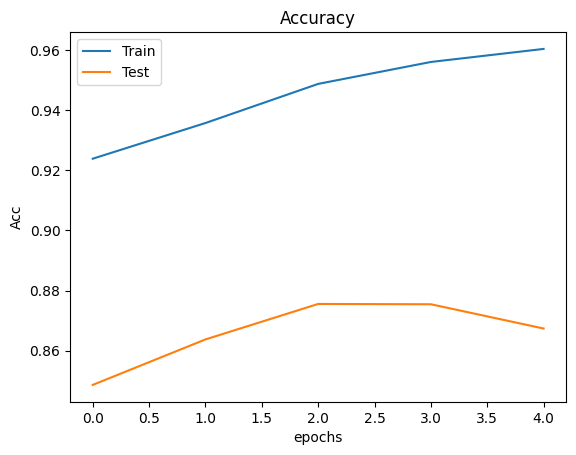

In [16]:
# Plot training and validation accuracy
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [17]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

310/310 [==============================] - 12s 37ms/step - loss: 0.4689 - accuracy: 0.8688
Test Loss: 0.46890780329704285
Test Accuracy: 0.8688111305236816


Logistic Regression

In [18]:
# Import libraries for Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
     

In [19]:
# Prepare data for Logistic Regression
A = data['review']
B = data['sentiment']
     

In [20]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(A,B, test_size=0.2, random_state=42)


In [21]:
# Transform text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit to 5000 features for simplicity
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [22]:

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500)  # Increase max_iter if convergence issues occur
log_reg.fit(X_train_tfidf, Y_train)

LogisticRegression(max_iter=500)

In [23]:
# Make Predictions
y_pred = log_reg.predict(X_test_tfidf)
     

In [24]:
# Evaluate Logistic Regression model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


Save Models

In [25]:
# Import pickle to save models
import pickle

In [26]:
# Save tokenizer
pickle.dump(tokenizer ,open('tokenizer.pkl' , 'wb'))

In [27]:
# Save LSTM model
pickle.dump(model ,open('model.pkl' , 'wb'))

INFO:tensorflow:Assets written to: ram://358cad87-bc43-4f10-8aee-003c2d5e3d37/assets
